# SciPy Tutorial

### What is `SciPy` ("Sigh Pie")?


<p align="center">
 <img src="images/Sigh Pie.png" alt="sigh pie" width="500"/>



`SciPy` is an open-source Python library which is used for scientific and technical computing. It is a collection of mathematical algorithms and convenience functions built on the `NumPy` extension of Python. Allows the user to manipulate and visualize data with a wide range of high-level commands.

Some of the key features and submodules of `SciPy` include:
- Integration&nbsp;&nbsp;&nbsp; (`scipy.integrate`)
- Optimization&nbsp;&nbsp;&nbsp; (`scipy.optimize`)
- Signal Processing&nbsp;&nbsp;&nbsp; (`scipy.signal`)
- Linear Algebra&nbsp;&nbsp;&nbsp; (`scipy.linalg`)
- Statistics&nbsp;&nbsp;&nbsp; (`scipy.stats`)
- Interpolation&nbsp;&nbsp;&nbsp; (`scipy.interpolate`)
- Special Functions&nbsp;&nbsp;&nbsp; (`scipy.special`)
- **Scientific Python Statistics**&nbsp;&nbsp;&nbsp; (`scipy.stats`)
- **Vector Quantization**&nbsp;&nbsp;&nbsp; (`scipy.cluster.vq`)

These features make `SciPy` an essential tool for scientists, engineers, and researchers who work with complex mathematical and scientific problems.


&nbsp;

### Where is it?

https://scipy.org/
- Main webpage for `SciPy`
- Has instructions and everything you need to know about `SciPy`
- Lets you know when new versions are released

https://github.com/scipy/scipy
- Main GitHub repository for `SciPy`
- Has everything you need in order to know about and use `SciPy` including bug reports and previous commits


&nbsp;

### Who created it?

`SciPy` was created by a community of developers and contributors rather than a single individual. It was originally developed by Travis Olliphant, who is a prominent figure in the Python scientific computing community. 

Travis Olliphant started the `SciPy` project in the late 1990s in order to address the need for a comprehensive library for scientific and technical computing in Python. He also played a significant role in the development of NumPy, which is a fundamental component of `SciPy`.


&nbsp;

### Uses in Environmental Data Science:

-	Data Preprocessing

-	Numerical Integration

-	Optimization

-	Spatial Analysis

-	Signal Processing

-	Interpolation

-	Simulation and Modeling

-	Geospatial Data

-	Image Processing

-	**Statistical Analysis**: Environmental data scientists use statistical methods to analyze trends, detect anomalies, and make predictions. SciPy's scipy.stats submodule provides a wide range of statistical tests and probability distributions for hypothesis testing and uncertainty analysis.

-	**Machine Learning Integration**: SciPy can be integrated with machine learning libraries like scikit-learn for environmental data classification, regression, clustering, and predictive modeling.

-	**Statistical Modeling**: Environmental scientists can use SciPy for fitting statistical models to data, allowing for the assessment of relationships between environmental variables and the development of predictive models.


ANOVA T-test *(Statistical Analysis and Modeling)*

Linear Regression *(Statistical Analysis and Modeling)*

Correlation Coefficient *(Statistical Analysis and Machine Learning Integration)*

&nbsp;

&nbsp;

# <p align="center"> **Spicy Penguin**

<p align="center">
 <img src="images/spicy penguin.jpg" alt="spicy penguin" width="400"/>

## Tutorial

Follow the steps below to ...

#### Installation

For this tutorial we are going to be using the Palmer Penguins data set [more info on palmer penguins]. First we will need to install this library.

- Run this section in the terminal:  ``` pip install palmerpenguins```

#### Import

To run some of the functions you'll need to import some other libraries that work with ```SciPy```.

Run the cell below:

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import scipy.stats as stats
from scipy.cluster.vq import kmeans, vq

Load the palmerpenguins data set from palmerpenguins by running the cell below:

In [2]:
from palmerpenguins import load_penguins
penguins = load_penguins()

Let's take a look at the data set.

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Now we're ready to start using ```scipy.stats```. 

### ANOVA

An Analysis of Variance (ANOVA) is a statistical formula used to compare variances across the means of different groups. In this section we are going to be comparing bill lengths of the three different species of penguins in the palmerpenguins dataset. 

- Note: We are going to run a one-way ANOVA here, since this is all that `SciPy` supports. To run a two-way ANOVA (comparing between two categorical variables), the `pingouin` library needs to be used. 

In [4]:
# Filter out any missing values in the 'bill_length_mm' and 'species' columns
species_length = penguins.dropna(subset=['bill_length_mm', 'species'])


# Extract data for each penguin species
species_groups = [species_length[species_length['species'] == species]['bill_length_mm'] for species in species_length['species'].unique()]
type(species_groups)


# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*species_groups)

# Print results
print("F-statistic:", f_statistic)
print("P-value:", p_value)


F-statistic: 410.6002550405077
P-value: 2.6946137388895484e-91


Assuming alpha = 0.05, what can we interpret from this p-value?

&nbsp;

### Correlation Coefficient

The correlation coefficient is a measure that tells us the strength of the linear relationship between two variables. This value ranges from -1 to 1 where -1 shows a perfect negative/inverse correlation, 1 shows a perfect positive/ direct relationship, and 0 is no linear relationship. In this tutorial we will be looking at both Pearson and Spearman correlation coefficients. 

Pearson Correlation:
- Measures only linear relationships
- Ratio between the covariance of two variables and the product of their standard deviations

Spearman Correlation:
- Ranks data instead of relying on their actual values, making it suitable for data that is not normally distributed or ordinal data.
- While our example here using palmerpenguins show a linear monotonic relationship, Spearman can also be used for nonlinear monotonic relationships: 

<p align="center">
 <img src="images/Growth_equations.png" alt="monotonic growth" width="400"/>

In [5]:
# Filter out any missing values in the 'bill_length_mm' and 'bill_depth_mm' columns
mass_length = penguins.dropna(subset=['bill_length_mm', 'body_mass_g'])

# Extract the data for the two variables of interest
x_data = mass_length['bill_length_mm']
y_data = mass_length['body_mass_g']

# Calculate Pearson correlation coefficient
pearson_corr, _ = stats.pearsonr(x_data, y_data)

# Calculate Spearman correlation coefficient
spearman_corr, _ = stats.spearmanr(x_data, y_data)

# Print the results
print("Pearson Correlation Coefficient:", pearson_corr)
print("Spearman Correlation Coefficient:", spearman_corr)

Pearson Correlation Coefficient: 0.5951098244376306
Spearman Correlation Coefficient: 0.5838003194455482


These results indicate a moderately strong relationship between bill length and bodymass.

&nbsp;

### Linear Regression

`linregress` in the `SciPy.Stats` package fits a simple linear regression model to the form: y = mx + b

- y = dependent variable
- x = independent variable
- m = slope
- b = intercept


**Parameters**:

`x`: The independent variable data (array-like).

`y`: The dependent variable data (array-like).

`alternative`: Specifies the alternative hypothesis for hypothesis testing (default is "two-sided").

`method`: Specifies the method for computing p-values (default is "auto").

**Returns**:

`slope`: The slope of the regression line, indicating the change in the dependent variable for a unit change in the independent variable.

`intercept`: The intercept of the regression line, representing the predicted value of the dependent variable when the independent variable is zero.

`rvalue`: The correlation coefficient, indicating the strength and direction of the linear relationship between the variables. In our example, the return output of `linregress` is an R-squared value, which is the proportion of variance in the dependent variable that can be explained by the independent variable. 

`pvalue`: The two-tailed p-value for testing the null hypothesis that the slope of the regression line is zero (no relationship).

`stderr`: The standard error of the estimated gradient. 

Slope (Coefficient): 87.41527705287548
Intercept: 362.3067216539225
R-squared: 0.35415570314218675
P-value: 3.808282842018238e-34
Standard Error of the Estimate: 6.40198532585216


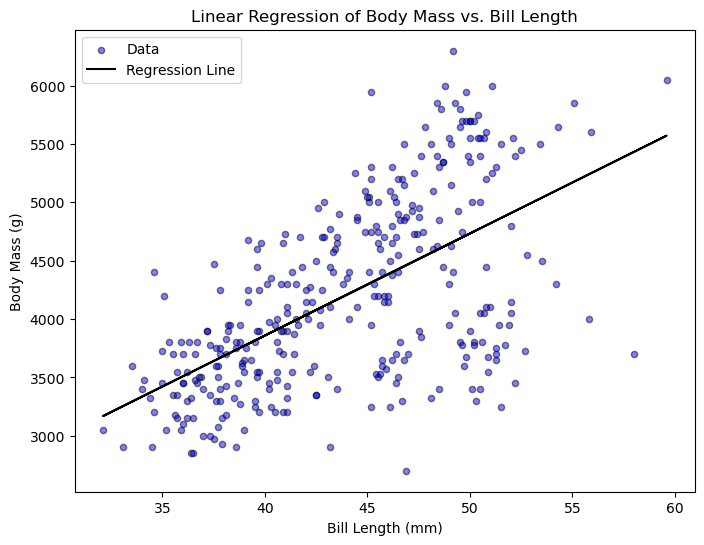

<Figure size 640x480 with 0 Axes>

In [6]:

# Filter out any missing values in the 'bill_length_mm' and 'body_mass_g' columns
mass_length = penguins.dropna(subset=['bill_length_mm', 'body_mass_g'])

# Extract the data for the two variables of interest
x_data = mass_length['bill_length_mm']
y_data = mass_length['body_mass_g']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x_data, y_data)

# Print the regression results
print("Slope (Coefficient):", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("P-value:", p_value)
print("Standard Error of the Estimate:", std_err)

# Visualize the regression line
regression_graph = plt.figure(figsize=(8,6))


plt.scatter(x_data, y_data, label='Data', marker="o", s=20, c='blue', edgecolors='black' , linewidths=1, alpha=0.5)
plt.plot(x_data, intercept + slope * x_data, 'k', label='Regression Line')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Linear Regression of Body Mass vs. Bill Length')
plt.legend()
# plt.grid(True)
plt.show()
plt.tight_layout()

## K Means Clustering

In [12]:
penguins = penguins.dropna(subset=['flipper_length_mm', 'bill_length_mm'])

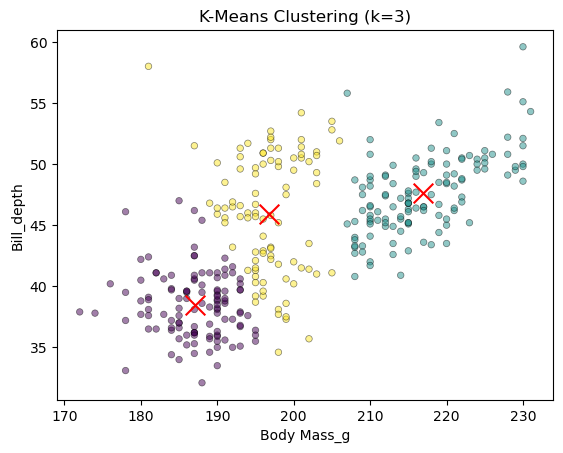

Cluster Centroids:
[[187.05217391  38.45304348]
 [216.92        47.6296    ]
 [196.7311828   45.95483871]]


In [22]:
# Define the number of clusters (k)
k = 3

data = penguins[['flipper_length_mm', 'bill_length_mm']]  

# Perform k-means clustering
centroids, _ = kmeans(data, k)

# Assign each data point to a cluster
cluster_ids, _ = vq(data, centroids)

# Plot the data points and cluster centroids
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=cluster_ids, marker='o', s=22, edgecolors='black', linewidths=0.5, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)
plt.title(f'K-Means Clustering (k={k})')
plt.xlabel('Body Mass_g')
plt.ylabel('Bill_depth')
plt.show()

# Print the cluster centroids
print("Cluster Centroids:")
print(centroids)

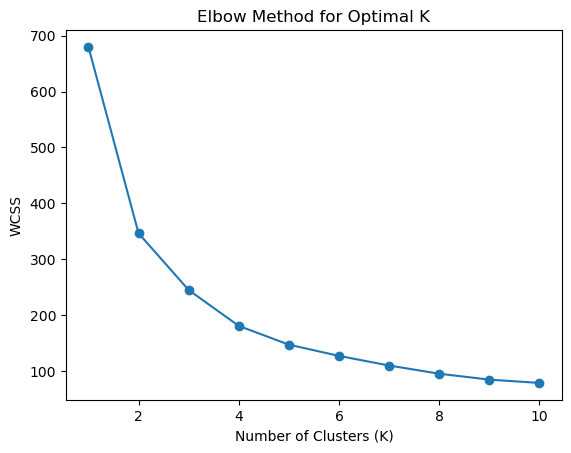

In [11]:
data = penguins[['bill_length_mm', 'body_mass_g']]

# Determine the optimal K using the Elbow Method
wcss = []  # Within-cluster sum of squares
for k in range(1, 11):  # Try different values of K
    centroids, distortion = kmeans(data, k)
    wcss.append(distortion)

# Plot the WCSS values
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()